# **CNN from Scratch on CIFAR-100**

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


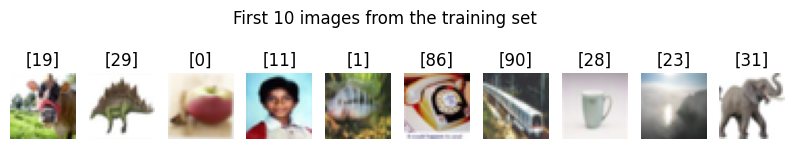

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.suptitle("First 10 images from the training set")
plt.show()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=2)


Epoch 1/15
625/625 - 8s - 13ms/step - accuracy: 0.0498 - loss: 4.2542 - val_accuracy: 0.1329 - val_loss: 3.7983
Epoch 2/15
625/625 - 6s - 10ms/step - accuracy: 0.1163 - loss: 3.7842 - val_accuracy: 0.1888 - val_loss: 3.4510
Epoch 3/15
625/625 - 5s - 8ms/step - accuracy: 0.1552 - loss: 3.5512 - val_accuracy: 0.2178 - val_loss: 3.2363
Epoch 4/15
625/625 - 3s - 5ms/step - accuracy: 0.1810 - loss: 3.3981 - val_accuracy: 0.2477 - val_loss: 3.1232
Epoch 5/15
625/625 - 5s - 8ms/step - accuracy: 0.1989 - loss: 3.2920 - val_accuracy: 0.2673 - val_loss: 3.0220
Epoch 6/15
625/625 - 5s - 8ms/step - accuracy: 0.2159 - loss: 3.2214 - val_accuracy: 0.2693 - val_loss: 2.9920
Epoch 7/15
625/625 - 3s - 4ms/step - accuracy: 0.2236 - loss: 3.1569 - val_accuracy: 0.2775 - val_loss: 2.9538
Epoch 8/15
625/625 - 5s - 8ms/step - accuracy: 0.2345 - loss: 3.0914 - val_accuracy: 0.2932 - val_loss: 2.8929
Epoch 9/15
625/625 - 2s - 4ms/step - accuracy: 0.2446 - loss: 3.0446 - val_accuracy: 0.2969 - val_loss: 2.8581

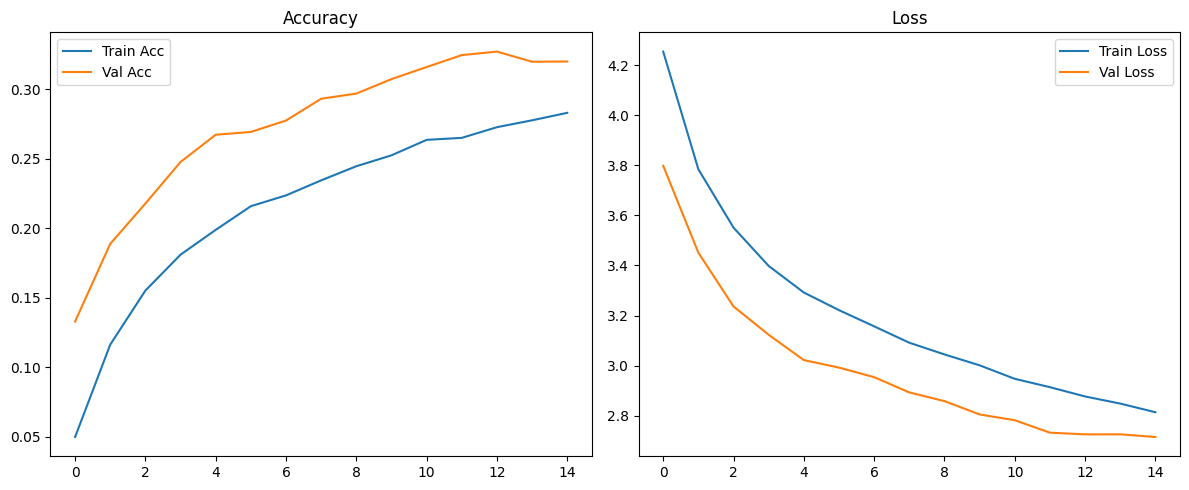

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

# **Using a Pretrained Model as a Classifier (Direct Use)**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

In [ ]:
model = ResNet50(weights='imagenet')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
sample = x_test[0]
img_resized = array_to_img(sample).resize((224, 224))
img_array = img_to_array(img_resized)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

In [ ]:
img_preprocessed

array([[[[146.061   ,  89.221   ,  62.32    ],
         [146.061   ,  89.221   ,  62.32    ],
         [144.061   ,  89.221   ,  62.32    ],
         ...,
         [147.061   , 110.221   ,  89.32    ],
         [147.061   , 110.221   ,  91.32    ],
         [147.061   , 110.221   ,  91.32    ]],

        [[145.061   ,  89.221   ,  62.32    ],
         [145.061   ,  89.221   ,  62.32    ],
         [144.061   ,  89.221   ,  62.32    ],
         ...,
         [147.061   , 111.221   ,  90.32    ],
         [147.061   , 111.221   ,  91.32    ],
         [147.061   , 111.221   ,  91.32    ]],

        [[145.061   ,  88.221   ,  62.32    ],
         [145.061   ,  88.221   ,  62.32    ],
         [144.061   ,  88.221   ,  62.32    ],
         ...,
         [147.061   , 111.221   ,  91.32    ],
         [147.061   , 111.221   ,  92.32    ],
         [147.061   , 111.221   ,  92.32    ]],

        ...,

        [[-16.939003, -70.779   , -83.68    ],
         [-16.939003, -70.779   , -82.68    ]

In [ ]:
preds = model.predict(img_preprocessed)
decoded = decode_predictions(preds, top=3)[0]

for i in decoded:
    print(f"{i[1]}: {i[2]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
volcano: 28.73%
frilled_lizard: 13.88%
solar_dish: 10.14%


# **Transfer Learning (3 Approaches)**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/time-image-datasetclassification")

print("Path to dataset files:", path)

100%|██████████| 383M/383M [00:18<00:00, 21.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/time-image-datasetclassification/versions/5


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
   path +  '/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    path +  '/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 9216 images belonging to 144 classes.
Found 288 images belonging to 144 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 144)            │        18,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,798,928 (56.45 MB)

 Trainable params: 84,240 (329.06 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator, verbose=2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


288/288 - 59s - 204ms/step - accuracy: 0.0067 - loss: 4.9811 - val_accuracy: 0.0174 - val_loss: 4.9652
Epoch 2/10
288/288 - 45s - 157ms/step - accuracy: 0.0072 - loss: 4.9584 - val_accuracy: 0.0069 - val_loss: 4.9433
Epoch 3/10
288/288 - 47s - 164ms/step - accuracy: 0.0077 - loss: 4.9212 - val_accuracy: 0.0104 - val_loss: 4.8881
Epoch 4/10
288/288 - 47s - 162ms/step - accuracy: 0.0100 - loss: 4.8663 - val_accuracy: 0.0069 - val_loss: 4.8134
Epoch 5/10
288/288 - 48s - 165ms/step - accuracy: 0.0123 - loss: 4.7933 - val_accuracy: 0.0243 - val_loss: 4.7304
Epoch 6/10
288/288 - 81s - 280ms/step - accuracy: 0.0138 - loss: 4.7309 - val_accuracy: 0.0174 - val_loss: 4.6461
Epoch 7/10
288/288 - 47s - 163ms/step - accuracy: 0.0162 - loss: 4.6651 - val_accuracy: 0.0451 - val_loss: 4.5908
Epoch 8/10
288/288 - 48s - 166ms/step - accuracy: 0.0214 - loss: 4.6076 - val_accuracy: 0.0243 - val_loss: 4.5084
Epoch 9/10
288/288 - 80s - 279ms/step - accuracy: 0.0230 - loss: 4.5499 - val_accuracy: 0.0451 - va

# **Fine-Tuning**

In [ ]:
base_model.trainable = True

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 144)            │        18,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,798,928 (56.45 MB)

 Trainable params: 14,798,928 (56.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 144)            │        18,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,798,928 (56.45 MB)

 Trainable params: 7,163,664 (27.33 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_ft = model.fit(train_generator, epochs=5, validation_data=val_generator, verbose=2)


Epoch 1/5
288/288 - 166s - 575ms/step - accuracy: 0.0061 - loss: 47.4291 - val_accuracy: 0.0069 - val_loss: 4.9906
Epoch 2/5
288/288 - 126s - 437ms/step - accuracy: 0.0069 - loss: 4.9891 - val_accuracy: 0.0069 - val_loss: 4.9857
Epoch 3/5
288/288 - 126s - 438ms/step - accuracy: 0.0055 - loss: 4.9849 - val_accuracy: 0.0069 - val_loss: 4.9817
Epoch 4/5
288/288 - 126s - 437ms/step - accuracy: 0.0063 - loss: 4.9813 - val_accuracy: 0.0069 - val_loss: 4.9783
Epoch 5/5
288/288 - 126s - 436ms/step - accuracy: 0.0063 - loss: 4.9784 - val_accuracy: 0.0069 - val_loss: 4.9757


# **CNN Feature Extraction + Traditional ML Classifier**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import os

# Paths
train_dir = path +  '/train'
test_dir = path +  '/test'

# Data generators
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Load pretrained model (feature extractor only)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
gap_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
feature_model = Model(inputs=base_model.input, outputs=gap_layer)

# Extract features
features_train = feature_model.predict(train_generator, verbose=1)
features_test = feature_model.predict(test_generator, verbose=1)

labels_train = train_generator.classes
labels_test = test_generator.classes

# Train SVM
clf = SVC(kernel='linear')
clf.fit(features_train, labels_train)

# Predict and evaluate
y_pred = clf.predict(features_test)
acc = accuracy_score(labels_test, y_pred)
print(f"SVM Accuracy on Test Set: {acc:.4f}")

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 59s 162ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step
SVM Accuracy on Test Set: 0.3535


# **Pretrained Models on Fashion-MNIST**


Using VGG16...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 60s 164ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step
VGG16 Test Accuracy: 0.3535

Using ResNet50...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step
ResNet50 Test Accuracy: 0.3826

Using InceptionV3...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step
InceptionV3 Test Accuracy: 0.2153

Using MobileNetV2...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step
MobileNetV2 Test Accuracy: 0.1257

Using EfficientNetB0...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
EfficientNetB0 Test Accuracy: 0.2111


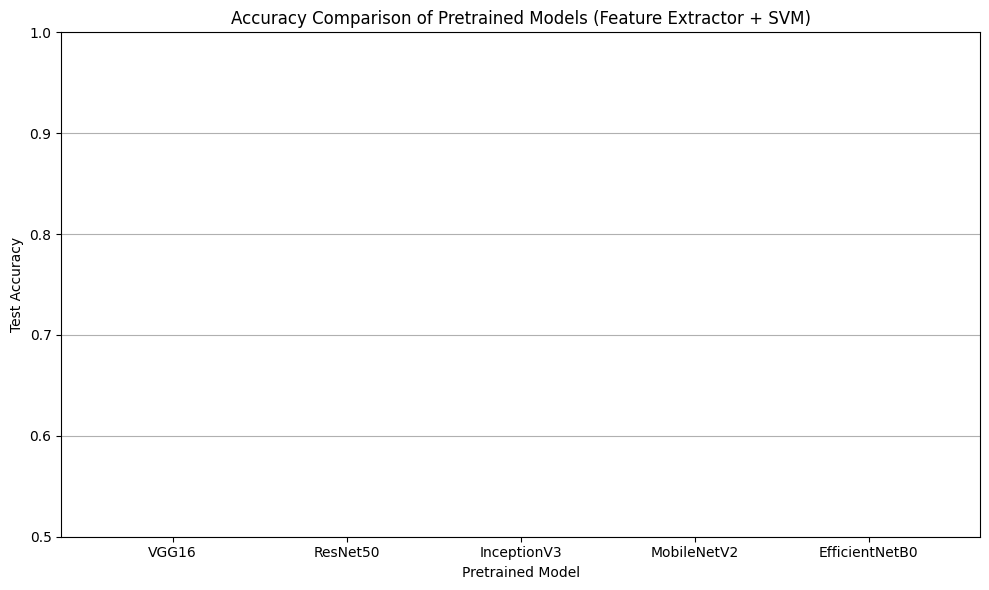

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_pre
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np



models = [
    ('VGG16', VGG16, vgg_pre),
    ('ResNet50', ResNet50, resnet_pre),
    ('InceptionV3', InceptionV3, inception_pre),
    ('MobileNetV2', MobileNetV2, mobilenet_pre),
    ('EfficientNetB0', EfficientNetB0, efficientnet_pre)
]

results = []

for name, model_fn, pre_fn in models:
    print(f"\nUsing {name}...")

    datagen = ImageDataGenerator(preprocessing_function=pre_fn)

    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse',
        shuffle=False
    )

    test_gen = datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse',
        shuffle=False
    )

    base_model = model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    feature_model = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

    features_train = feature_model.predict(train_gen, verbose=1)
    features_test = feature_model.predict(test_gen, verbose=1)

    y_train = train_gen.classes
    y_test = test_gen.classes

    clf = SVC(kernel='linear')
    clf.fit(features_train, y_train)

    y_pred = clf.predict(features_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"{name} Test Accuracy: {acc:.4f}")

model_names = [r[0] for r in results]
accuracies = [r[1] for r in results]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.title("Accuracy Comparison of Pretrained Models (Feature Extractor + SVM)")
plt.xlabel("Pretrained Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Training VGG16...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


VGG16 Accuracy: 0.0083

Training ResNet50...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
ResNet50 Accuracy: 0.1097

Training InceptionV3...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
InceptionV3 Accuracy: 0.0368

Training MobileNetV2...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
MobileNetV2 Accuracy: 0.0285

Training EfficientNetB0...
Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
EfficientNetB0 Accuracy: 0.0319


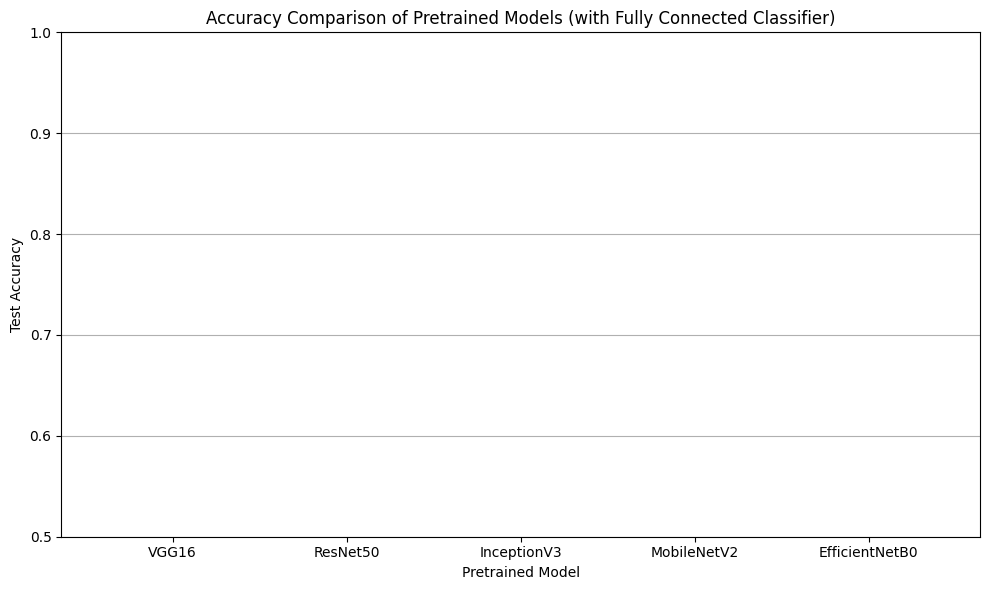

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_pre
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf



models = [
    ('VGG16', VGG16, vgg_pre),
    ('ResNet50', ResNet50, resnet_pre),
    ('InceptionV3', InceptionV3, inception_pre),
    ('MobileNetV2', MobileNetV2, mobilenet_pre),
    ('EfficientNetB0', EfficientNetB0, efficientnet_pre)
]

results = []

for name, model_fn, pre_fn in models:
    print(f"\nTraining {name}...")

    datagen = ImageDataGenerator(preprocessing_function=pre_fn)

    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    test_gen = datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    base_model = model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(train_gen.num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_gen, epochs=5, validation_data=test_gen, verbose=0)

    loss, acc = model.evaluate(test_gen, verbose=0)
    results.append((name, acc))
    print(f"{name} Accuracy: {acc:.4f}")

model_names = [r[0] for r in results]
accuracies = [r[1] for r in results]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.title("Accuracy Comparison of Pretrained Models (with Fully Connected Classifier)")
plt.xlabel("Pretrained Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
